<a href="https://colab.research.google.com/github/deepakatAviSoft/march_assignments/blob/main/20_03_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Amazon_cloths sells cloths online. Customers come in to the store, have meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.
Following is predict is analysis for this company

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

Read in the Ecommerce Customers csv file as a DataFrame called customers.
Data Analysis
Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.
explore these types of relationships across the entire data set
Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?
Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.
Training and Testing Data
Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.
Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101
Training the Model
Now its time to train our model on our training data!
 Import LinearRegression from sklearn.linear_model
Create an instance of a LinearRegression() model named.
Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!
Use lm.predict() to predict off the X_test set of the data.
Create a scatterplot of the real test values versus the predicted values.
Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).
Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.
Residuals
Let's quickly explore the residuals to make sure everything was okay with our data.
Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist()
Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.
Do you think the company should focus more on their mobile app or on their website?
ans: MobileApp

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
customers = pd.read_csv("/content/drive/MyDrive/Ecommerce Customers.csv")

In [5]:
customers

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


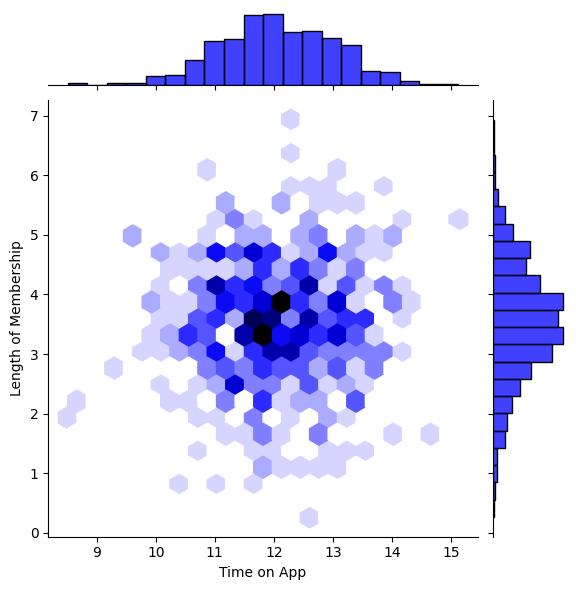

In [6]:
x = customers['Time on App']
y = customers['Length of Membership']
sns.jointplot(x=x,y=y,kind='hex',color='blue')

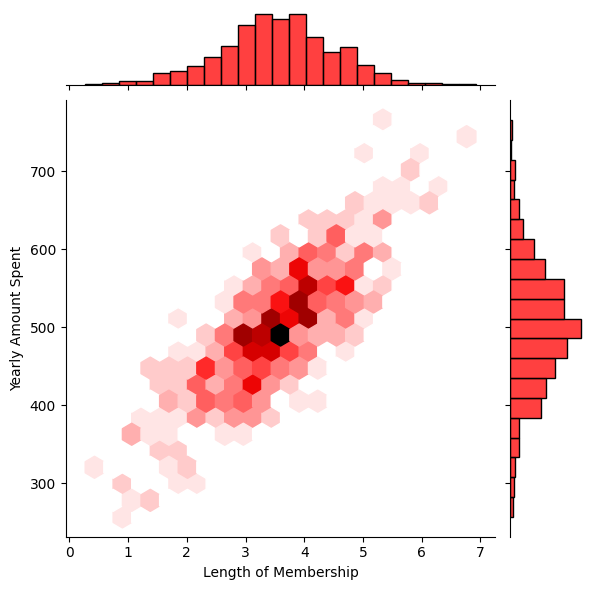

In [7]:
x = customers['Length of Membership']
y = customers['Yearly Amount Spent']
sns.jointplot(x=x,y=y,kind='hex',color='red')

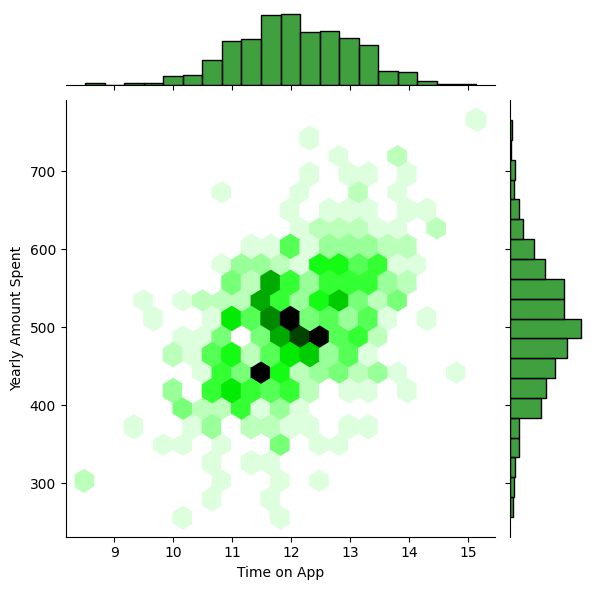

In [8]:
x=customers['Time on App']
y=customers['Yearly Amount Spent']
sns.jointplot(x=x,y=y,kind='hex',color='green')

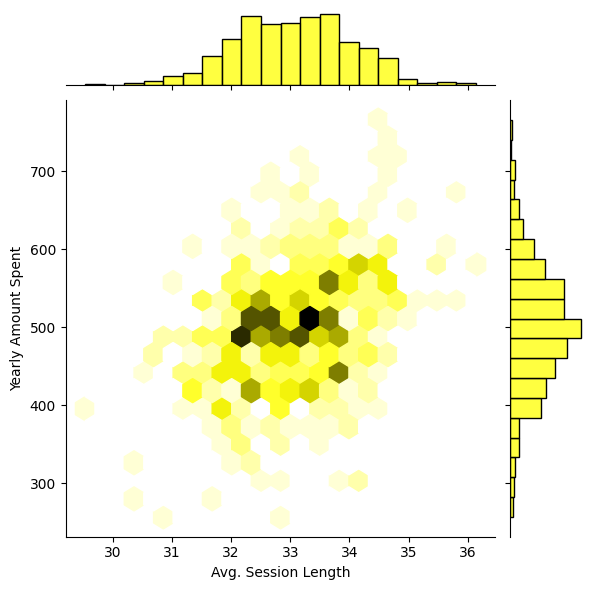

In [9]:
x=customers['Avg. Session Length']
y=customers['Yearly Amount Spent']
sns.jointplot(x=x,y=y,kind='hex',color='yellow')

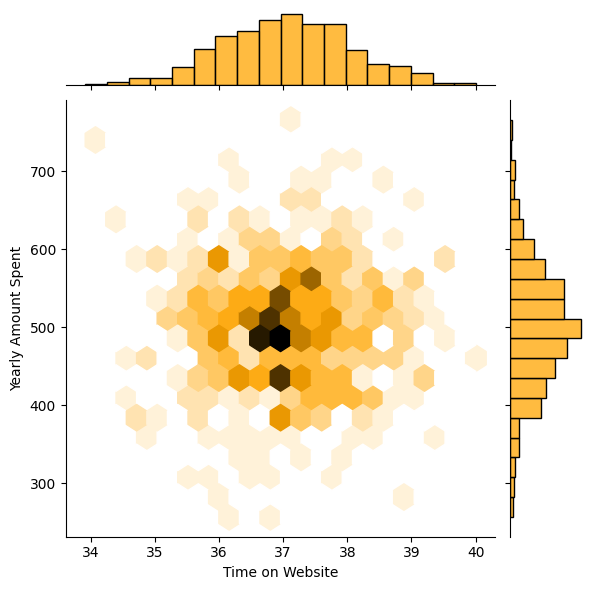

In [10]:
x=customers['Time on Website']
y=customers['Yearly Amount Spent']
sns.jointplot(x=x,y=y,kind='hex',color='orange')

In [11]:
correlation_coefficients = customers.corr()['Yearly Amount Spent'].drop('Yearly Amount Spent')
print("Correlation coefficients:")
print(correlation_coefficients)

Correlation coefficients:
Avg. Session Length     0.355088
Time on App             0.499328
Time on Website        -0.002641
Length of Membership    0.809084
Name: Yearly Amount Spent, dtype: float64


<ipython-input-11-ddc5b7d7fef1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_coefficients = customers.corr()['Yearly Amount Spent'].drop('Yearly Amount Spent')


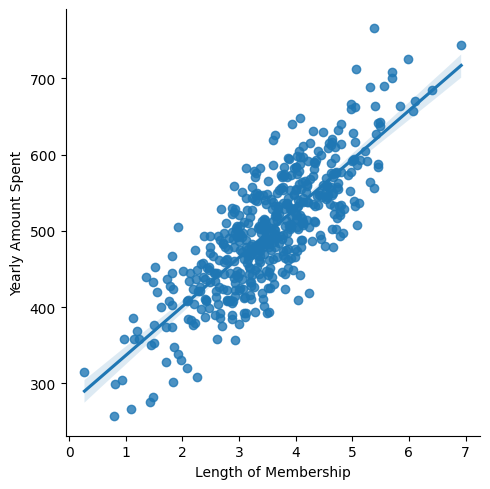

In [12]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)


In [13]:
X=customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=customers['Yearly Amount Spent']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [14]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [15]:
y_predict=lm.predict(X_test)
print(f'The predictions made are:{y_predict}')

The predictions made are:[456.44186104 402.72005312 409.2531539  591.4310343  590.01437275
 548.82396607 577.59737969 715.44428115 473.7893446  545.9211364
 337.8580314  500.38506697 552.93478041 409.6038964  765.52590754
 545.83973731 693.25969124 507.32416226 573.10533175 573.2076631
 397.44989709 555.0985107  458.19868141 482.66899911 559.2655959
 413.00946082 532.25727408 377.65464817 535.0209653  447.80070905
 595.54339577 667.14347072 511.96042791 573.30433971 505.02260887
 565.30254655 460.38785393 449.74727868 422.87193429 456.55615271
 598.10493696 449.64517443 615.34948995 511.88078685 504.37568058
 515.95249276 568.64597718 551.61444684 356.5552241  464.9759817
 481.66007708 534.2220025  256.28674001 505.30810714 520.01844434
 315.0298707  501.98080155 387.03842642 472.97419543 432.8704675
 539.79082198 590.03070739 752.86997652 558.27858232 523.71988382
 431.77690078 425.38411902 518.75571466 641.9667215  481.84855126
 549.69830187 380.93738919 555.18178277 403.43054276 472

<Axes: xlabel='Yearly Amount Spent'>

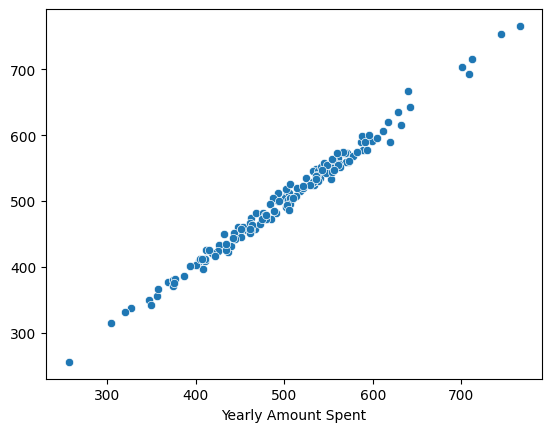

In [16]:
sns.scatterplot(x=y_test,y=y_predict)

In [17]:
r2squared=r2_score(y_test,y_predict)
print(f'The R2 Score of the model is:{r2squared}')

The R2 Score of the model is:0.9890046246741234


In [18]:
Rss=sum((y_test-y_predict)**2)
print(f'Residual sum of squares is :{Rss}')

Residual sum of squares is :11971.957747646138


In [19]:
MeanSquaredError=mse(y_test,y_predict)
RootMeanSquaredError=np.sqrt(MeanSquaredError)
MeanAbsoluteError=mae(y_test,y_predict)
print(f'The Mean Squared Error of our model is: {MeanSquaredError}')
print(f'The Root Mean Squared Error of our model is: {RootMeanSquaredError}')
print(f'The Mean Absolute Error of our model is: {MeanAbsoluteError}')

The Mean Squared Error of our model is: 79.81305165097427
The Root Mean Squared Error of our model is: 8.933815066978624
The Mean Absolute Error of our model is: 7.228148653430826


Text(0, 0.5, 'Frequency')

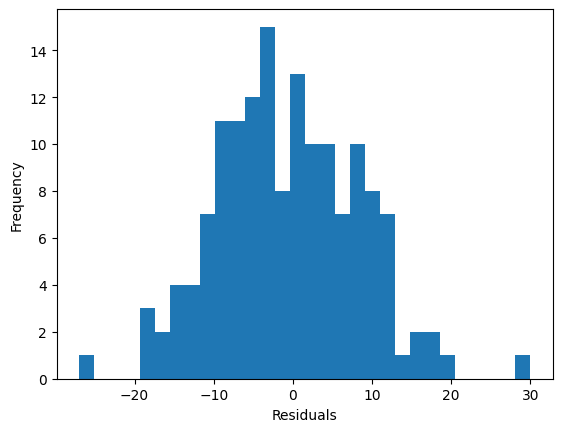

In [20]:
residuals=y_test-y_predict
plt.hist(residuals,bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')